In [1]:
import pickle
import os

from scipy.signal import medfilt
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools 
import pandas as pd
import math

## Learning Curve Plots

In [2]:
def plot_learning_average(env_name, ax, experiment, window_size, var = True, OnePlayer = False):
    
    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name
    results = {}
        
    for exp in experiment:
        results[exp] = {}
        for seed in range(5):
            try:
                with open(base_dir + '/' + exp + str(seed) + '/results', 'rb') as f:
                    results[exp][seed] = pickle.load(f)             
            except IOError:
                print(base_dir + '/' + exp + str(seed) + '/results' + " not opened")
            
    plot_learning_curves(results, ax, env_name, window_size, var, best = False)

def plot_learning_best(env_name, seed, ax, experiment, window_size, var = True, OnePlayer = False):

    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name
    results = {}
        
    for i, exp in enumerate(experiment):
        results[exp] = {}
        try:
            with open(base_dir + '/' + exp + str(seed[i]) + '/results', 'rb') as f:
                results[exp] = pickle.load(f)             
        except IOError:
            print("No files opened")
            
    plot_learning_curves(results, ax, env_name, window_size, var, best = True)
    
def plot_learning_curves(results, ax, env_name, window_size, var, best):    
    colors = ['#396ab1', '#cc2529', '#3e9651', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']

    idx = 0
    final_avg = []
    final_std = []
    for exp in results:
        if(best):
            merged = list(itertools.chain(*(results[exp]['eval_rewards'])))
        else:
            reward = []    
            for seed in results[exp]:
                reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
            merged = list(itertools.chain.from_iterable(reward))
        result_dict = {}
        for i in range(0, len(merged), 2):
            if(math.isnan(merged[i+1]) == False):
                if str(merged[i]) in result_dict.keys():
                    result_dict[str(merged[i])].append(merged[i+1]) 
                else:
                    result_dict[str(merged[i])] = [merged[i+1]]
        length = len(result_dict)
        x = np.zeros(length)
        y_avg = np.zeros(length)
        y_std = np.zeros(length)
        for i, (key, value) in enumerate(result_dict.items()):
            x[i] = key
            y_avg[i] = np.mean(value)
            y_std[i] = np.std(value)

        if 'RMSprop' in exp:
            l = 'Baseline'
        else:
            l = 'SGLD'
        ax.plot(x, y_avg, color = colors[idx], label = exp)
#         ax.plot(x, y_avg, color = colors[idx], label = l)
        if (var):
            ax.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
        idx += 1  
      
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Reward')
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))    

In [3]:
def plot_learning_all(experiment, title, comparison, OnePlayer, best, seed=None):
    cols = 1
    rows = 1
    envs = ['simple-v0']
    fill = [True, False]
    for f in fill:
        fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
        for i, env in enumerate(envs):
#             ax = axs.flatten()[i]
            ax = axs
            if(comparison):
                exp = experiment[i]
            else:
                exp = experiment
            if(best):
                plot_learning_best(env, seed[i], ax, exp, window_size = 1, var = f, OnePlayer = OnePlayer)
            else:
                plot_learning_average(env, ax, exp, window_size = 1, var = f, OnePlayer = OnePlayer)
            if(comparison):
                ax.legend()
            else:
                if i == 0:
                    ax.legend()
        plt.tight_layout()
        
        if(OnePlayer):
            folder = 'OnePlayer'
        else:
            folder = 'TwoPlayer'
            
        if(f):
            plt.savefig('plots/'+ folder + '/Learning_curve/Std/' + title +'.pdf')                    
        else:
            plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'.pdf')

C:\Users\ythua\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


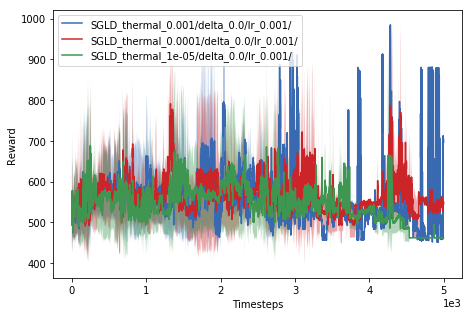

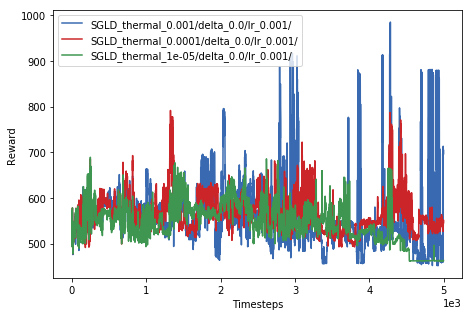

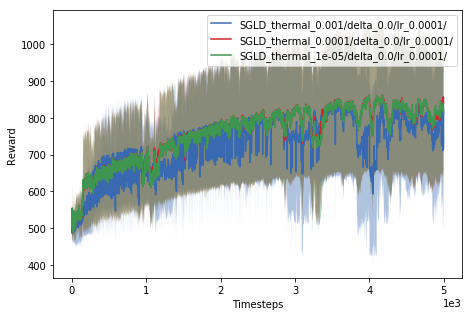

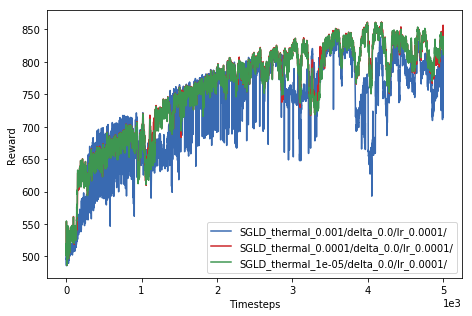

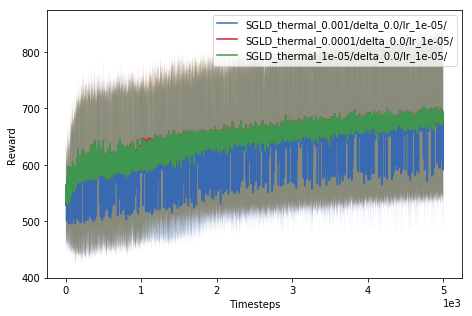

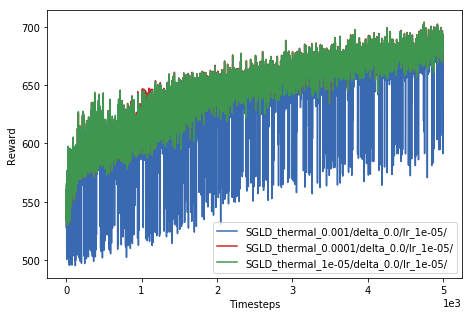

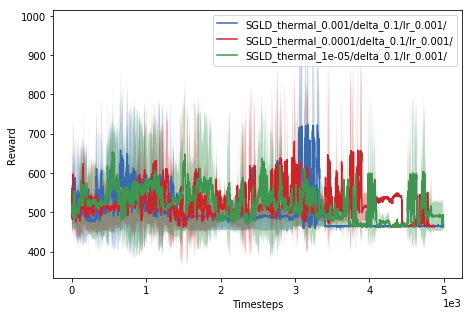

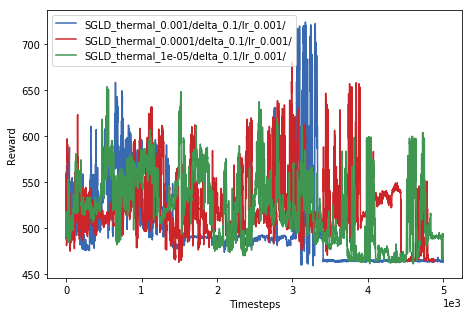

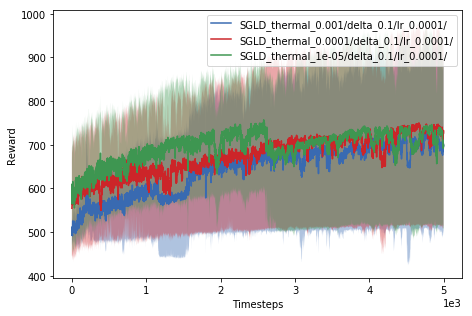

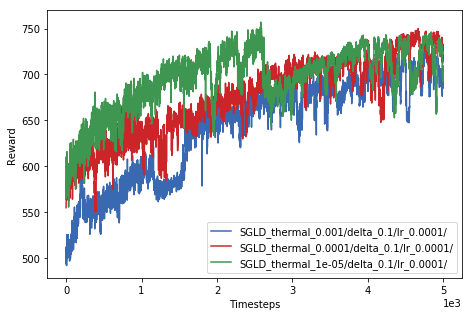

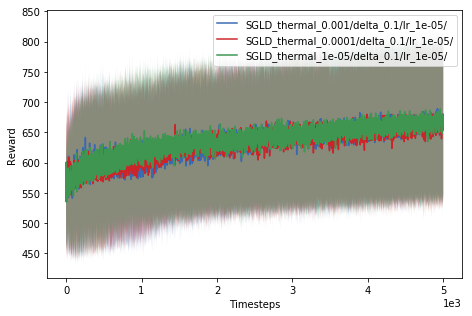

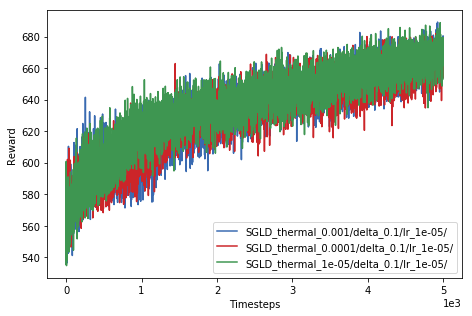

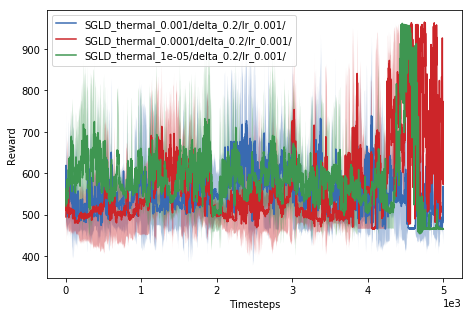

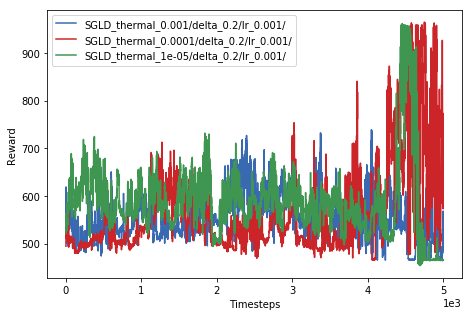

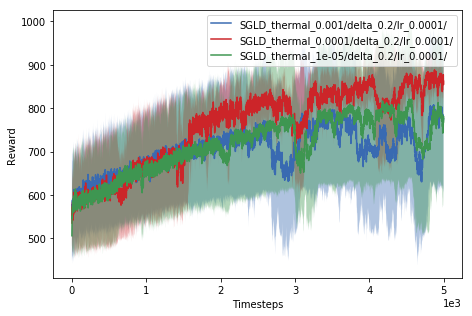

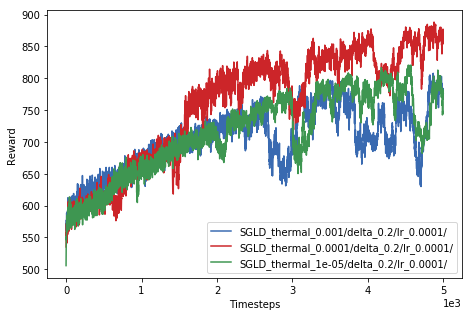

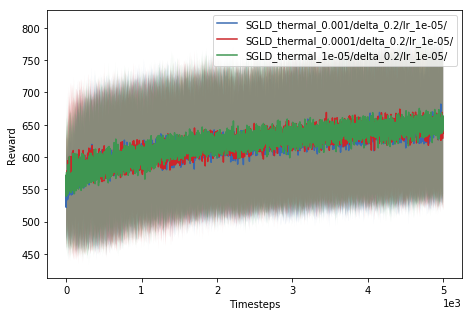

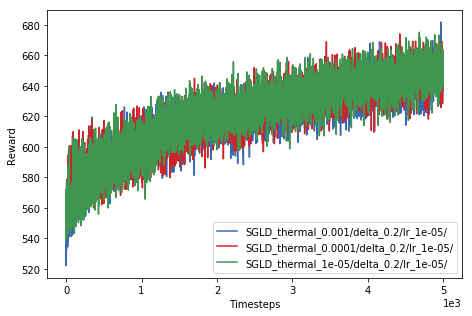

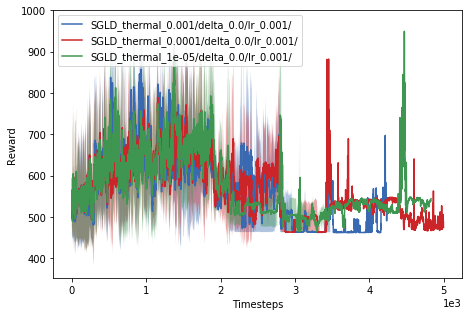

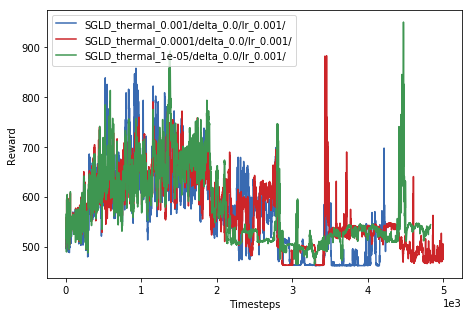

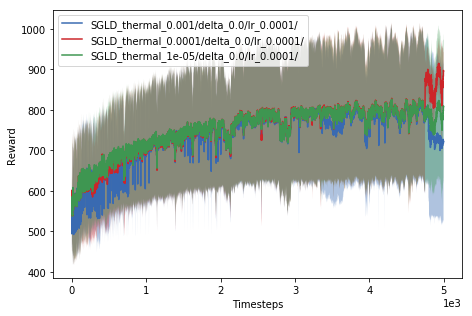

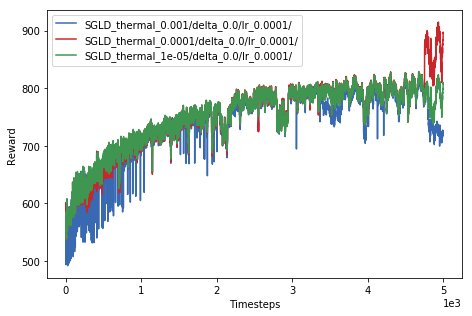

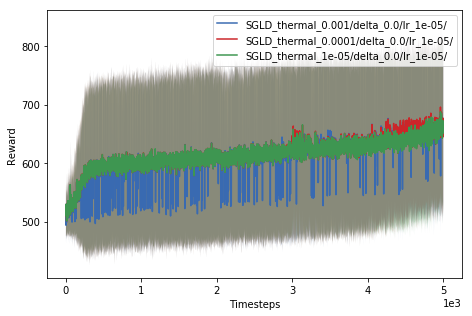

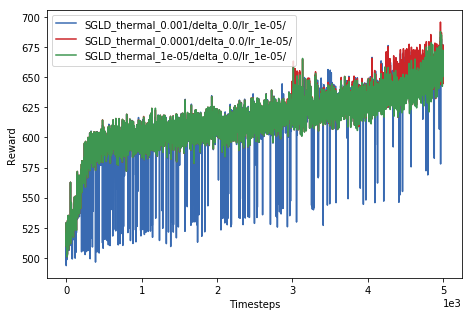

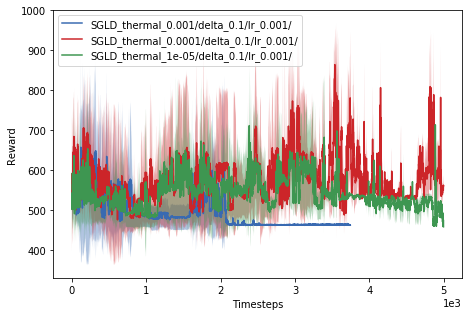

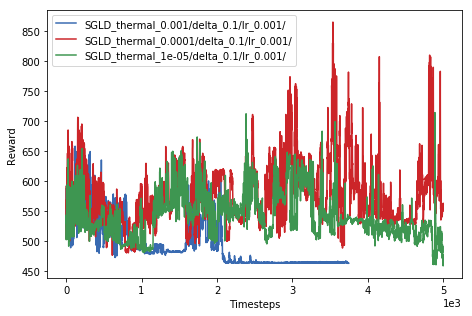

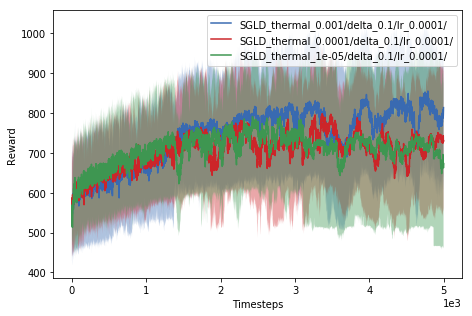

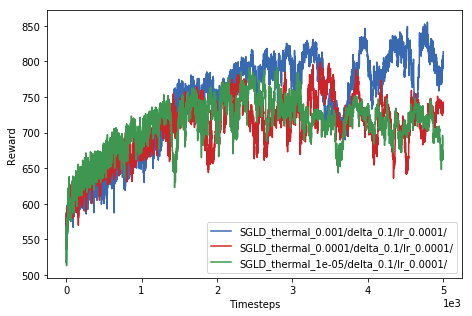

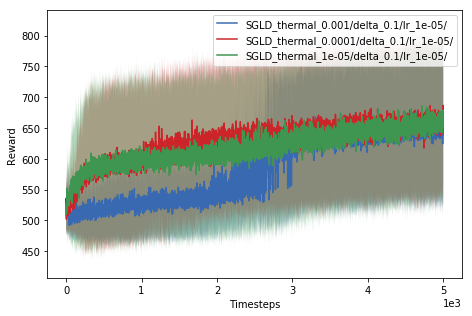

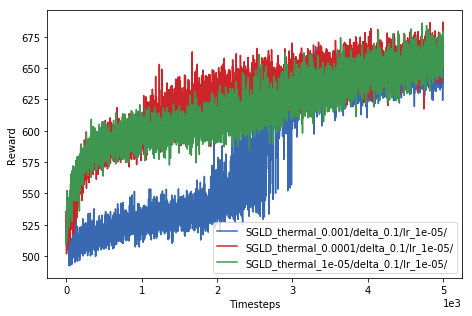

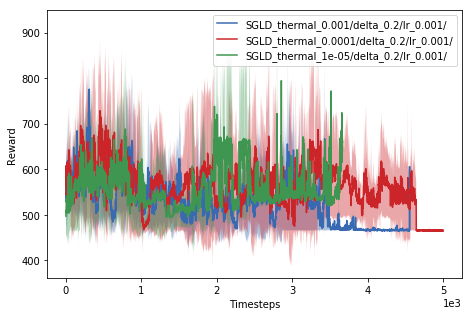

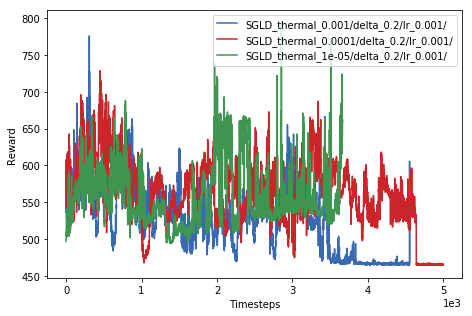

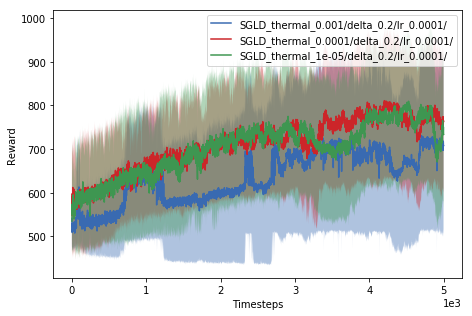

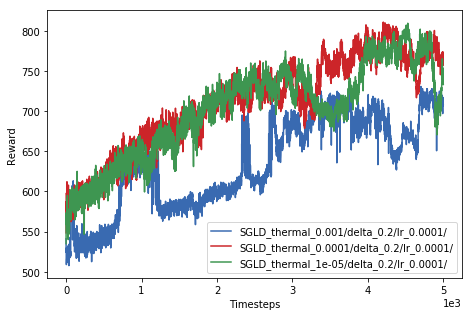

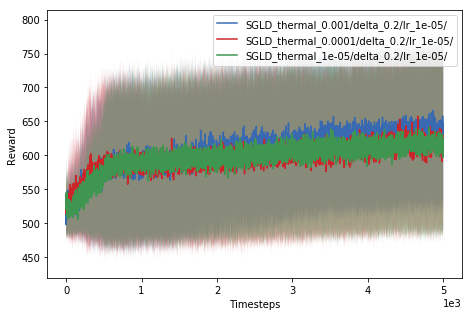

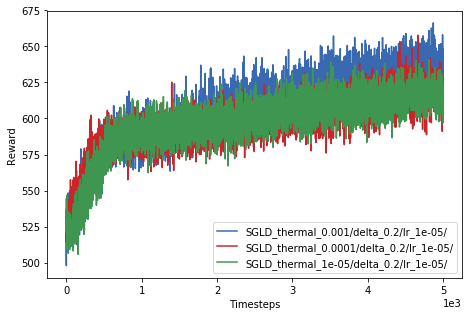

In [4]:
for f in [True, False]:
    for delta in ['0.0','0.1','0.2']:
        simple_exp = ['SGLD_thermal_0.001/delta_'+ delta +'/lr_0.001/', 'SGLD_thermal_0.0001/delta_'+ delta +'/lr_0.001/', 'SGLD_thermal_1e-05/delta_'+ delta +'/lr_0.001/']
        exp = [simple_exp]    
        plot_learning_all(exp, 'SGLD_rho_'+ delta + '_lr_0.001', comparison = True, OnePlayer = f, best = False)
        simple_exp = ['SGLD_thermal_0.001/delta_'+ delta +'/lr_0.0001/', 'SGLD_thermal_0.0001/delta_'+ delta +'/lr_0.0001/', 'SGLD_thermal_1e-05/delta_'+ delta +'/lr_0.0001/']
        exp = [simple_exp]    
        plot_learning_all(exp, 'SGLD_rho_'+ delta + '_lr_0.0001', comparison = True, OnePlayer = f, best = False)
        simple_exp = ['SGLD_thermal_0.001/delta_'+ delta +'/lr_1e-05/', 'SGLD_thermal_0.0001/delta_'+ delta +'/lr_1e-05/', 'SGLD_thermal_1e-05/delta_'+ delta +'/lr_1e-05/']
        exp = [simple_exp]    
        plot_learning_all(exp, 'SGLD_rho_'+ delta + '_lr_1e-05', comparison = True, OnePlayer = f, best = False)

C:\Users\ythua\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


C:\Users\ythua\policy-gradient-reinforce/models_TwoPlayer/simple-v0/E_SGLD_thermal_0.001/delta_0.2/lr_0.001/4/results not opened
C:\Users\ythua\policy-gradient-reinforce/models_TwoPlayer/simple-v0/E_SGLD_thermal_0.001/delta_0.2/lr_0.001/4/results not opened


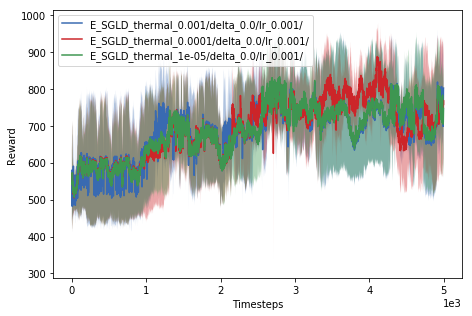

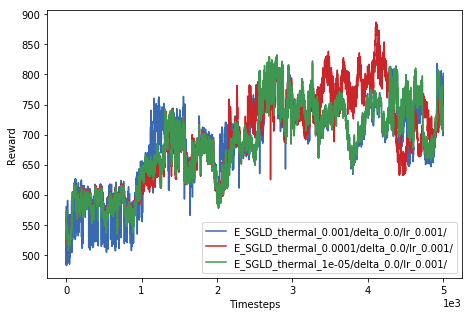

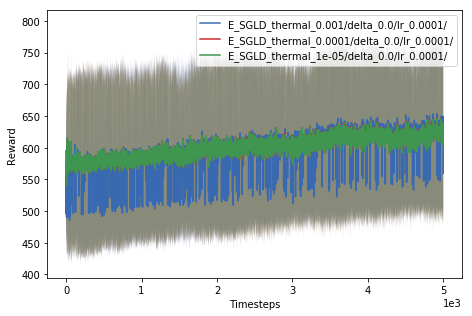

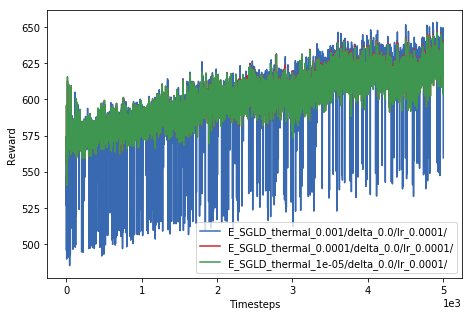

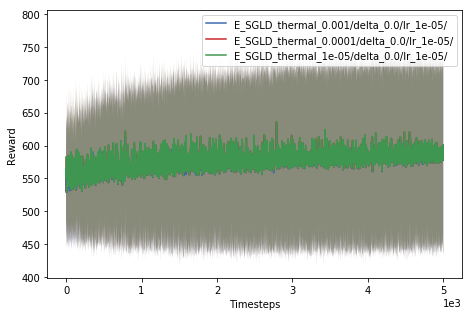

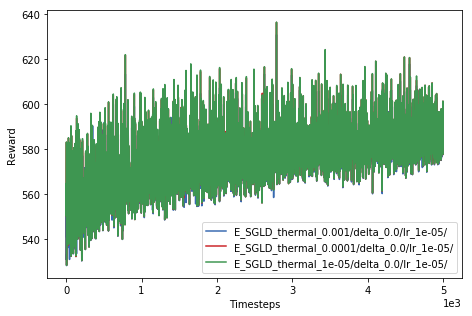

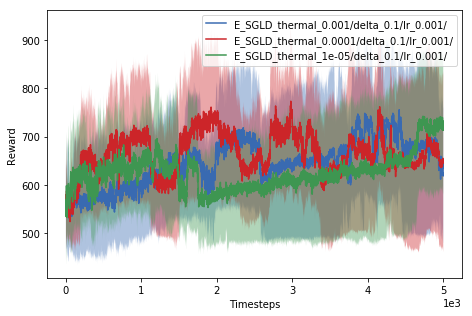

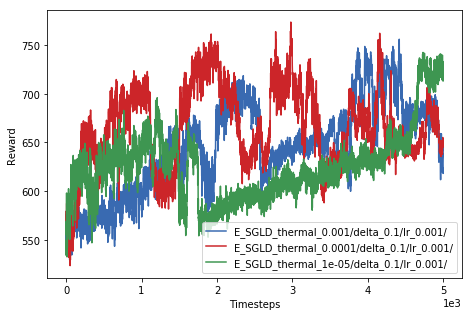

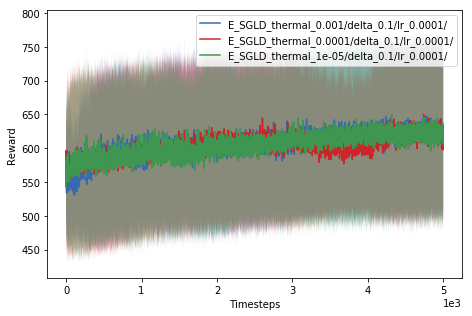

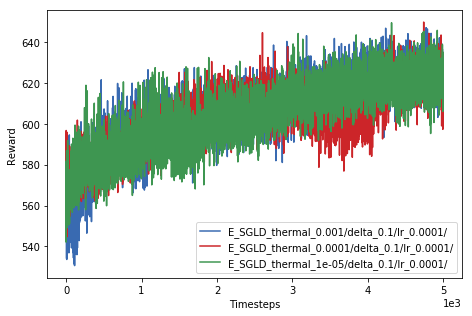

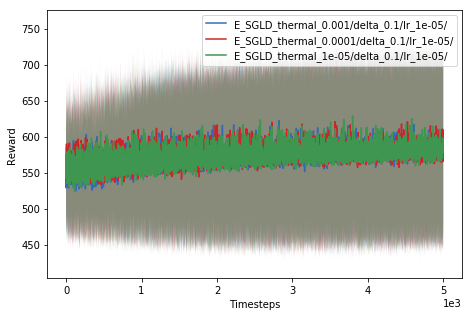

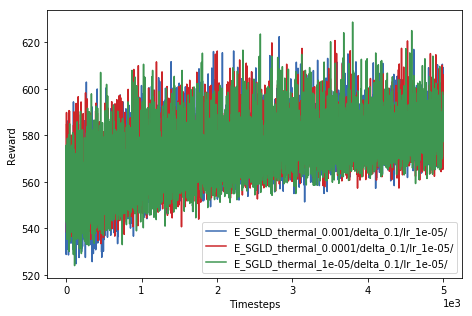

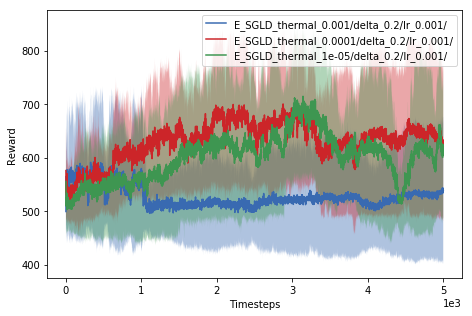

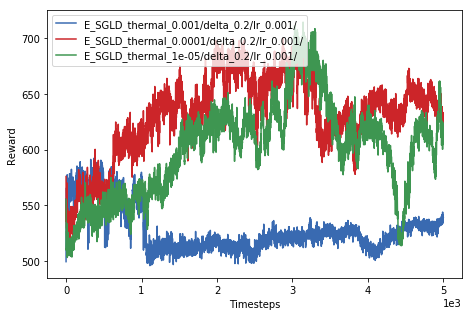

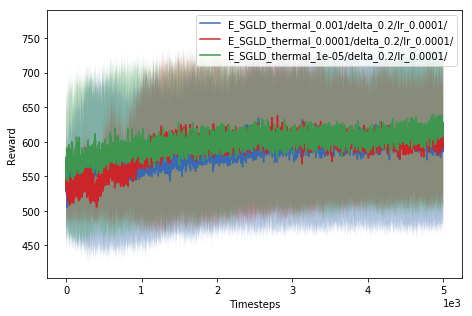

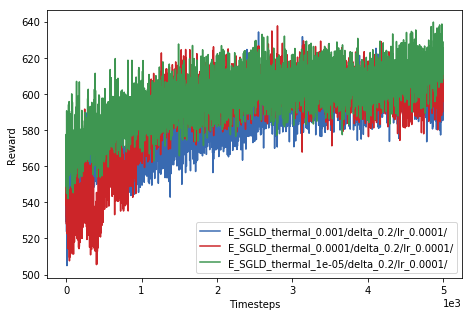

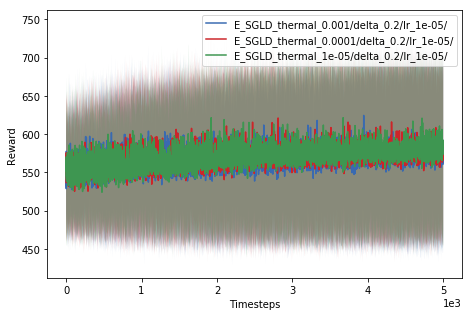

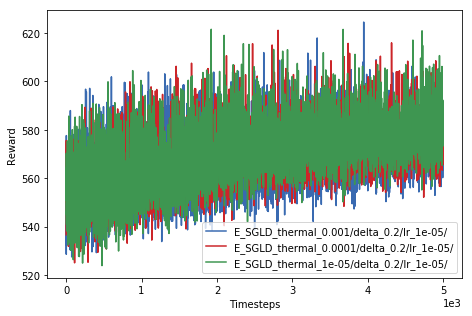

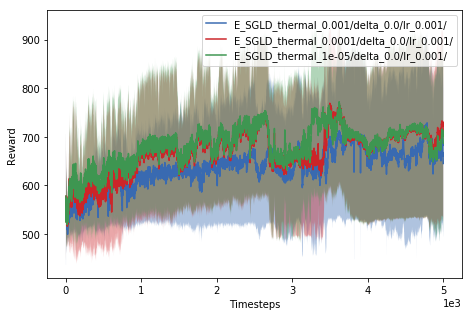

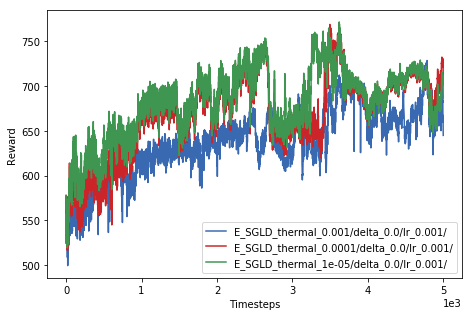

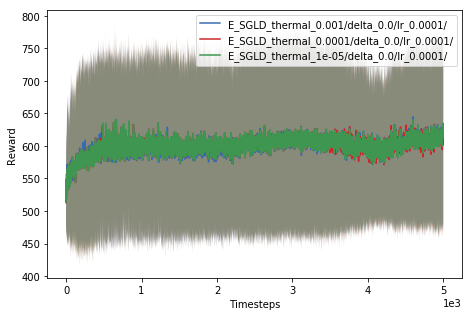

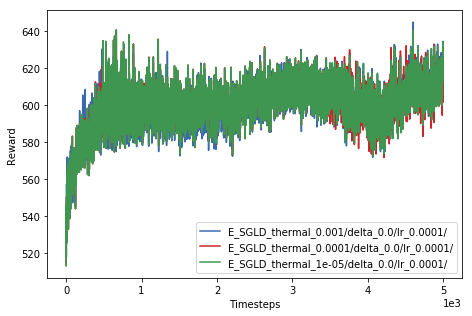

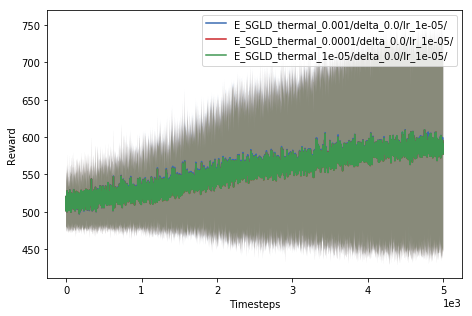

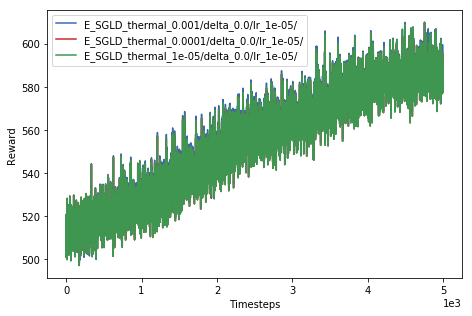

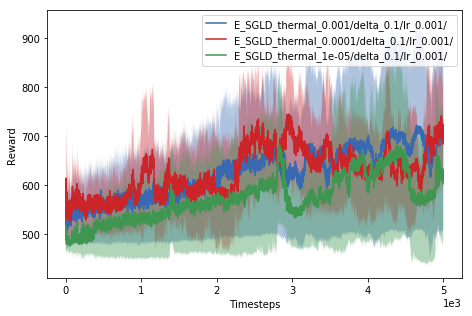

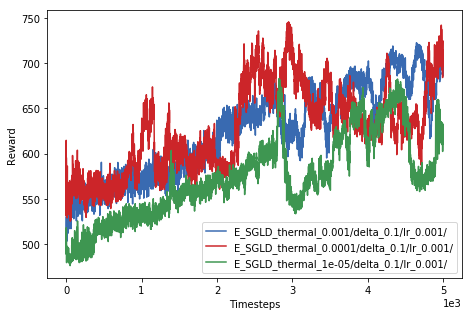

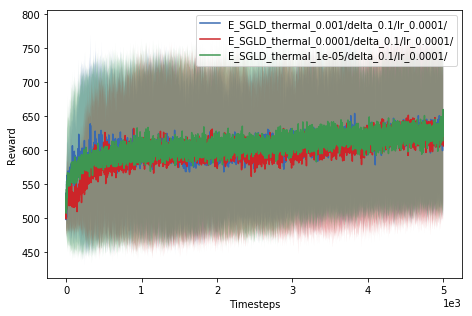

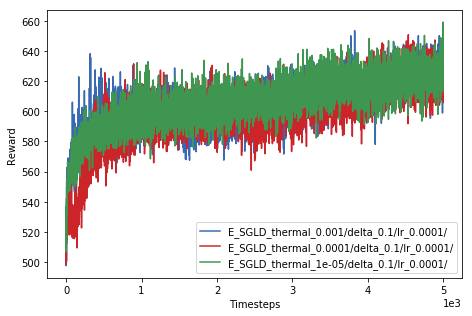

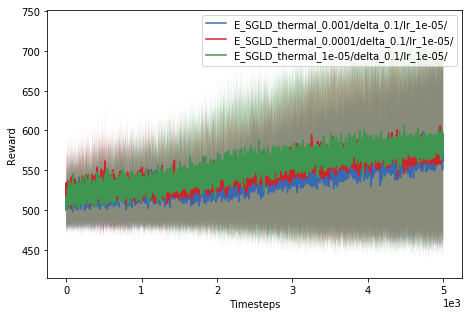

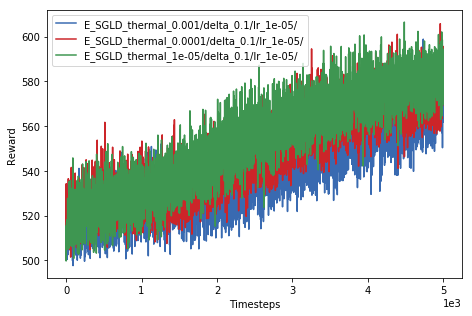

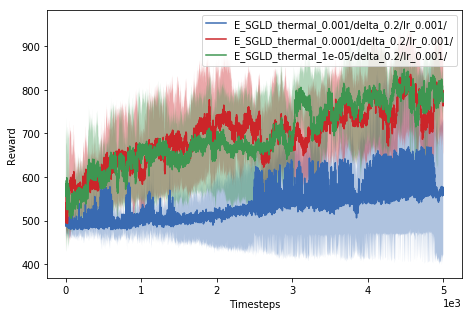

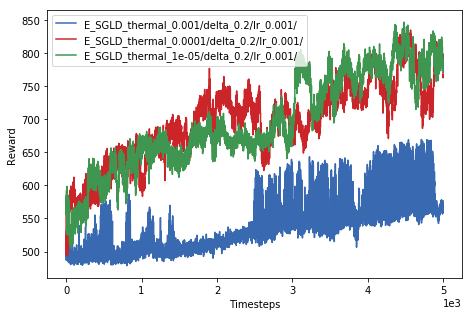

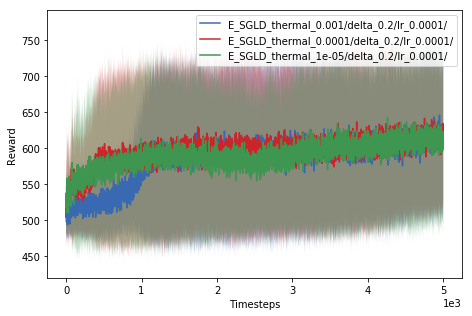

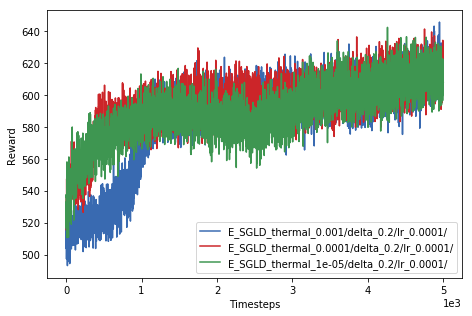

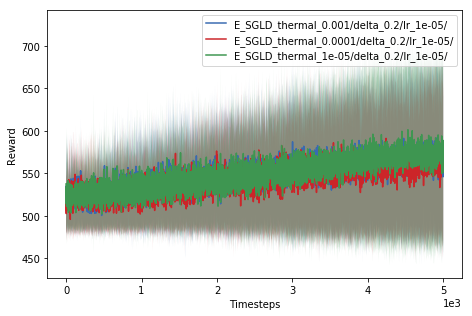

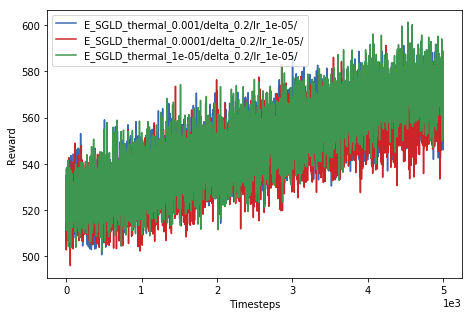

In [5]:
for f in [True, False]:
    for delta in ['0.0','0.1','0.2']:
        simple_exp = ['E_SGLD_thermal_0.001/delta_'+ delta +'/lr_0.001/', 'E_SGLD_thermal_0.0001/delta_'+ delta +'/lr_0.001/', 'E_SGLD_thermal_1e-05/delta_'+ delta +'/lr_0.001/']
        exp = [simple_exp]    
        plot_learning_all(exp, 'E_SGLD_rho_'+ delta + '_lr_0.001', comparison = True, OnePlayer = f, best = False)
        simple_exp = ['E_SGLD_thermal_0.001/delta_'+ delta +'/lr_0.0001/', 'E_SGLD_thermal_0.0001/delta_'+ delta +'/lr_0.0001/', 'E_SGLD_thermal_1e-05/delta_'+ delta +'/lr_0.0001/']
        exp = [simple_exp]    
        plot_learning_all(exp, 'E_SGLD_rho_'+ delta + '_lr_0.0001', comparison = True, OnePlayer = f, best = False)
        simple_exp = ['E_SGLD_thermal_0.001/delta_'+ delta +'/lr_1e-05/', 'E_SGLD_thermal_0.0001/delta_'+ delta +'/lr_1e-05/', 'E_SGLD_thermal_1e-05/delta_'+ delta +'/lr_1e-05/']
        exp = [simple_exp]    
        plot_learning_all(exp, 'E_SGLD_rho_'+ delta + '_lr_1e-05', comparison = True, OnePlayer = f, best = False)

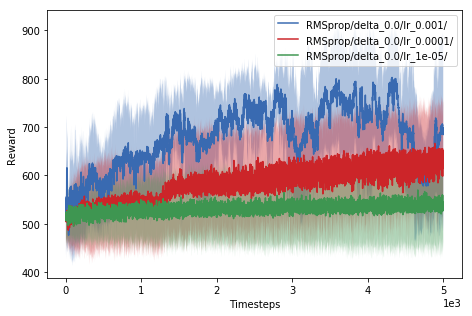

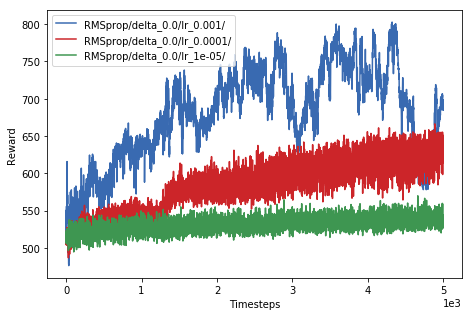

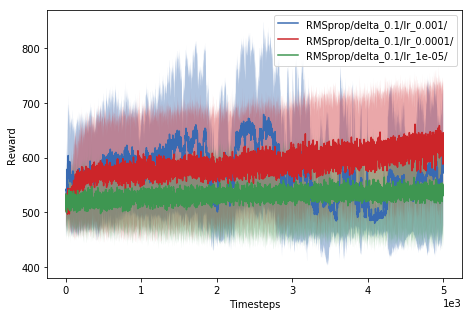

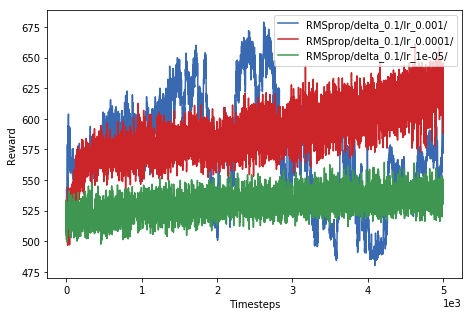

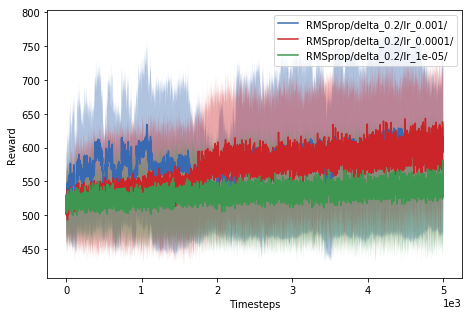

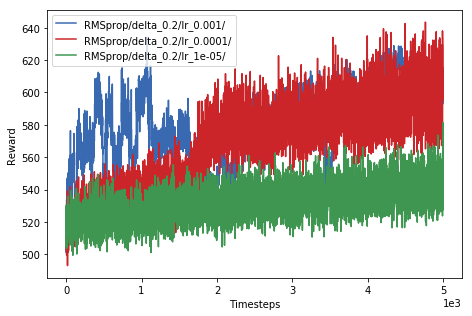

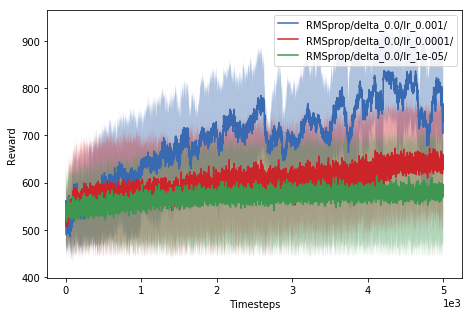

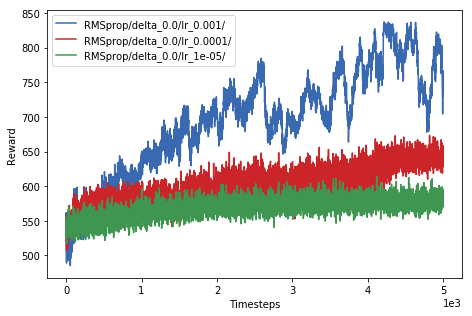

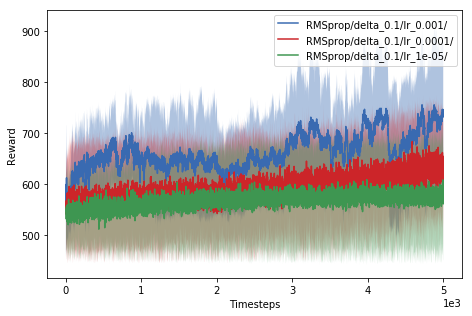

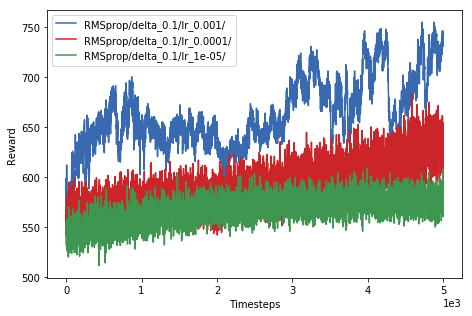

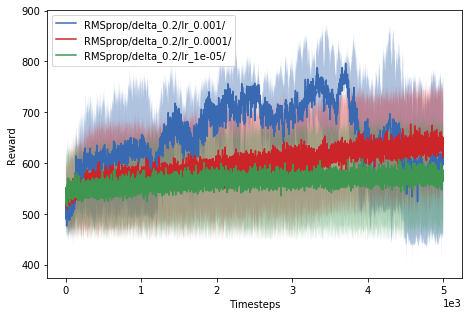

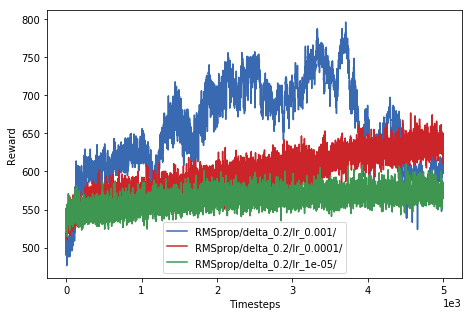

In [6]:
for f in [True, False]:
    simple_exp = ['RMSprop/delta_0.0/lr_0.001/', 'RMSprop/delta_0.0/lr_0.0001/', 'RMSprop/delta_0.0/lr_1e-05/']
    exp = [simple_exp]    
    plot_learning_all(exp, 'RMSprop_rho_0.0', comparison = True, OnePlayer = f, best = False)
    simple_exp = ['RMSprop/delta_0.1/lr_0.001/', 'RMSprop/delta_0.1/lr_0.0001/', 'RMSprop/delta_0.1/lr_1e-05/']
    exp = [simple_exp]    
    plot_learning_all(exp, 'RMSprop_rho_0.1', comparison = True, OnePlayer = f, best = False)
    simple_exp = ['RMSprop/delta_0.2/lr_0.001/', 'RMSprop/delta_0.2/lr_0.0001/', 'RMSprop/delta_0.2/lr_1e-05/']
    exp = [simple_exp]    
    plot_learning_all(exp, 'RMSprop_rho_0.2', comparison = True, OnePlayer = f, best = False)

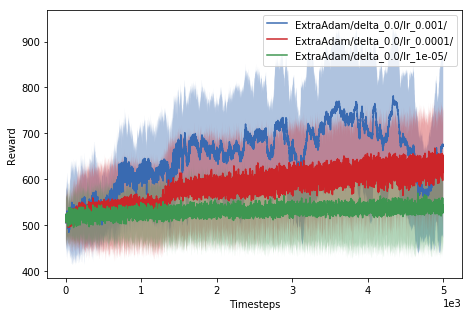

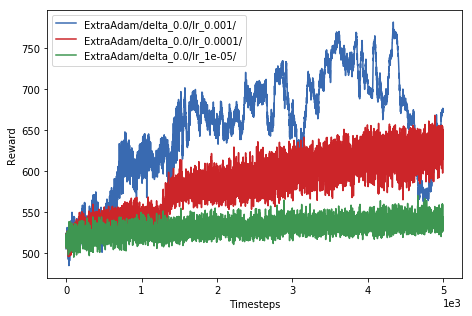

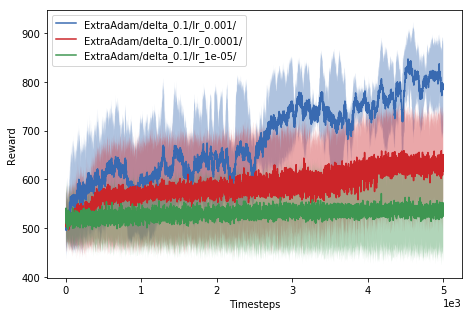

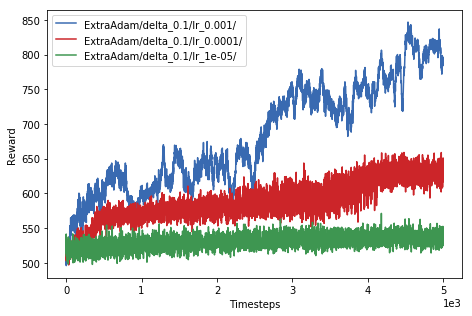

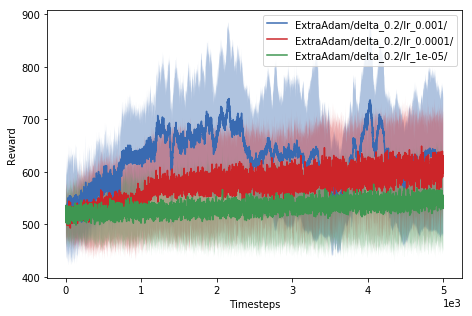

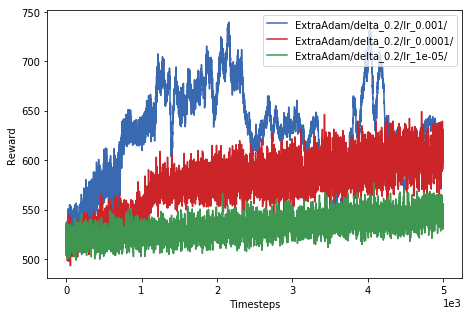

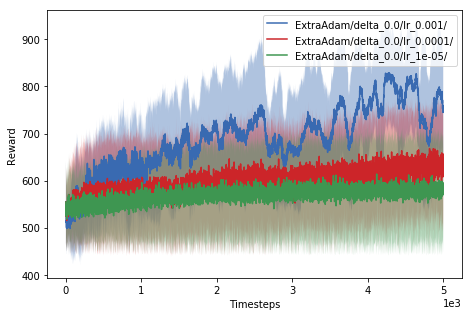

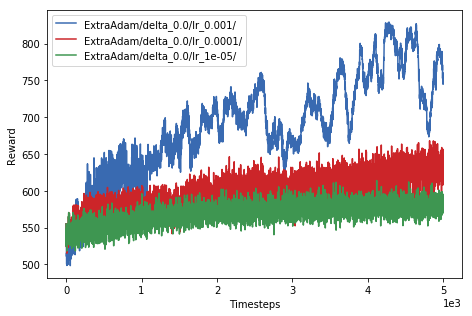

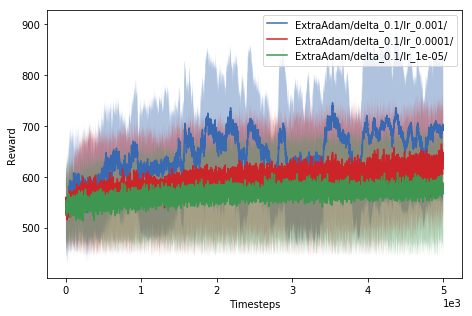

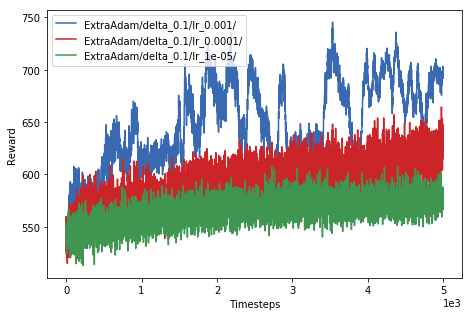

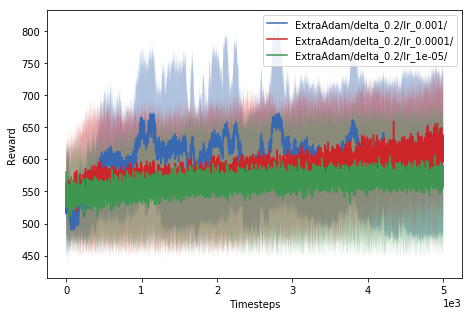

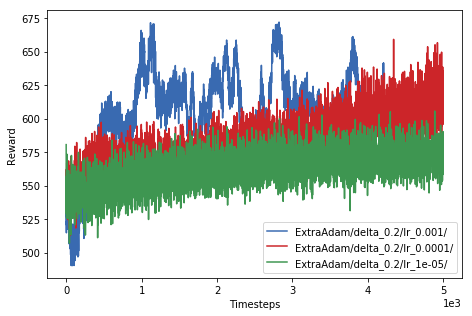

In [7]:
for f in [True, False]:
    simple_exp = ['ExtraAdam/delta_0.0/lr_0.001/', 'ExtraAdam/delta_0.0/lr_0.0001/', 'ExtraAdam/delta_0.0/lr_1e-05/']
    exp = [simple_exp]    
    plot_learning_all(exp, 'ExtraAdam_rho_0.0', comparison = True, OnePlayer = f, best = False)
    simple_exp = ['ExtraAdam/delta_0.1/lr_0.001/', 'ExtraAdam/delta_0.1/lr_0.0001/', 'ExtraAdam/delta_0.1/lr_1e-05/']
    exp = [simple_exp]    
    plot_learning_all(exp, 'ExtraAdam_rho_0.1', comparison = True, OnePlayer = f, best = False)
    simple_exp = ['ExtraAdam/delta_0.2/lr_0.001/', 'ExtraAdam/delta_0.2/lr_0.0001/', 'ExtraAdam/delta_0.2/lr_1e-05/']
    exp = [simple_exp]    
    plot_learning_all(exp, 'ExtraAdam_rho_0.2', comparison = True, OnePlayer = f, best = False)

In [ ]:
## One-Player Parameter
delta_0.0
ExtraAdam_lr_0.001
RMSprop_lr_0.001
SGLD_thermal_1e-4_lr_1e-4

delta_0.1
ExtraAdam_lr_0.001
RMSprop_lr_0.0001
SGLD_thermal_1e-4_lr_1e-4

delta_0.2
ExtraAdam_lr_0.001
RMSprop_lr_0.0001
SGLD_thermal_1e-4_lr_1e-4

In [ ]:
## Two-Player Parameter
delta_0.0
ExtraAdam_lr_0.001
RMSprop_lr_0.001
SGLD_thermal_1e-4_lr_1e-4

delta_0.1
ExtraAdam_lr_0.001
RMSprop_lr_0.001
SGLD_thermal_1e-3_lr_1e-4

delta_0.2
ExtraAdam_lr_0.0001
RMSprop_lr_0.0001
SGLD_thermal_1e-5_lr_1e-3

## Mass Uncertainty Plots

In [75]:
def plot_env(env_name, params, ax, var, OnePlayer, best, seed=None):

    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name
    results = {}
        
    for i, exp in enumerate(params):
        if(best):
            upper = seed[i] + 1
            lower = seed[i]
        else:
            upper = 5
            lower = 0
        results[exp] = {}
        for s in range(lower, upper):
            try:
                with open(base_dir + '/' + exp + str(s) + '/results_model', 'rb') as f:
                    results[exp][s] = pickle.load(f)                         
            except IOError:
                print("No file opened")
            
    plot_model(results, ax, env_name, var, OnePlayer)

def plot_model(results, ax, env_name, var, OnePlayer):
    x = [i for i in range(20)]
    colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    
    idx = 0
    for exp in results:
        if exp not in ['results_model']:
            avg = []
            std = []
            for seed in results[exp]:
                avg_seed = []
                std_seed = []
                for mass in results[exp][seed]:
                    avg_seed.append(np.mean(results[exp][seed][mass]))
                    std_seed.append(np.std(results[exp][seed][mass]) / np.sqrt(len(results[exp][seed][mass]) - 1) * 2)
                avg.append(avg_seed)
                std.append(std_seed)
            avg = np.array(avg)
            std = np.array(std)
            avg = np.mean(avg, axis=0)
            std = np.mean(std, axis=0)
            
        if 'RMSprop' in exp:
            l = 'GAD (RMSprop)'
        elif 'ExtraAdam' in exp:
            l = 'Extra-Adam'
        else:
            l = 'MixedNE-LD (RMSProp)'        
        if(OnePlayer):
            l = r'$\beta=$'+ str(exp[45:48]) + r', $K_t$='+ str(exp[52:53])
            ax.plot(x, avg, label=l, color=colors[idx], linestyle="--")
        else:
            ax.plot(x, avg, label=l, color=colors[idx], linestyle="-")
        if(var):
            ax.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
        idx += 1
  
    ax.set_xticks([0, 4.75, 9.5, 14.25, 19])
    ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4])
    ax.set_xlabel(r'Environment parameter $\rho$')
    ax.set_ylabel('Reward')

In [76]:
def plot_env_all(params, title, comparison, OnePlayer, best, seed = None):
    cols = 1
    rows = 1
    envs = ['simple-v0']
    fill = [True, False]
    for f in fill:
        fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
        for i, env in enumerate(envs):
#             ax = axs.flatten()[i]
            ax = axs
            if(comparison):
                param = params[i]
            else:
                param = params
            if(best):
                plot_env(env, param, ax, var = f, OnePlayer = OnePlayer, best = best, seed = seed[i])
            else:
                plot_env(env, param, ax, var = f, OnePlayer = OnePlayer, best = best)                
            if(comparison):
                ax.legend(loc='upper right')
            else:
                if i == 0:
                    ax.legend()
        plt.tight_layout()
        
        if(OnePlayer):
            folder = 'OnePlayer'
        else:
            folder = 'TwoPlayer'
            
        if(f):
            if(best):
                plt.savefig('plots/'+ folder + '/Mass_Uncertainty/' + title +'_best_fill.pdf')
            else:
                plt.savefig('plots/'+ folder + '/Mass_Uncertainty/' + title +'_fill.pdf')                    
        else:
            if(best):
                plt.savefig('plots/'+ folder + '/Mass_Uncertainty/' + title +'_best.pdf')
            else:
                plt.savefig('plots/'+ folder + '/Mass_Uncertainty/' + title +'.pdf')

In [60]:
def plot_env_merge(params, title, comparison):
    cols = 1
    rows = 1
    envs = ['simple-v0']
    fill = [True, False]
    for f in fill:
        fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
        for i, env in enumerate(envs):
            ax = axs
            if(comparison):
                param = params[i]
            else:
                param = params
            plot_env(env, param[0:3], ax, var = f, OnePlayer = True, best = False)
            plot_env(env, param[3:6], ax, var = f, OnePlayer = False, best = False)                
            if(comparison):
                ax.legend(loc='upper right')
            else:
                if i == 0:
                    ax.legend()
        plt.tight_layout()
        if(f):
            plt.savefig('plots/Merged/Mass_Uncertainty/'+ title +'_fill.pdf')
        else:
            plt.savefig('plots/Merged/Mass_Uncertainty/'+ title +'.pdf')

### Merged Plots for OnePlayer and TwoPlayer

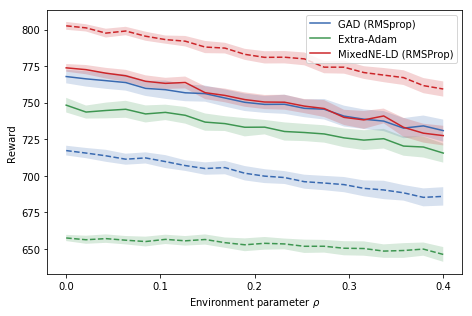

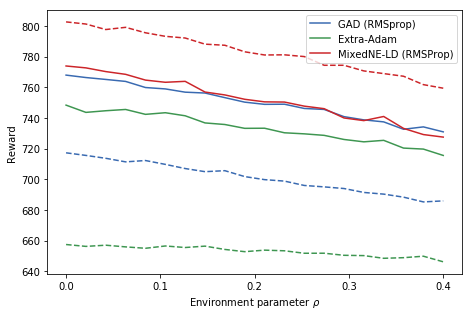

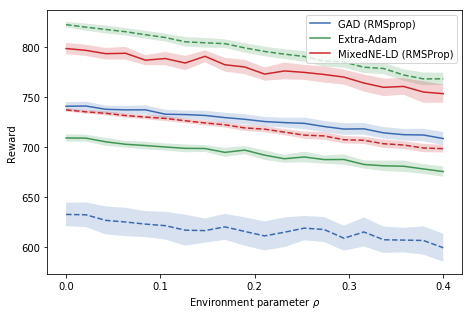

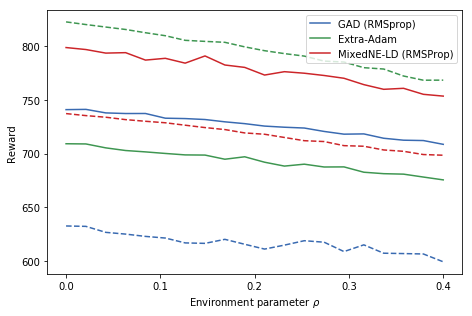

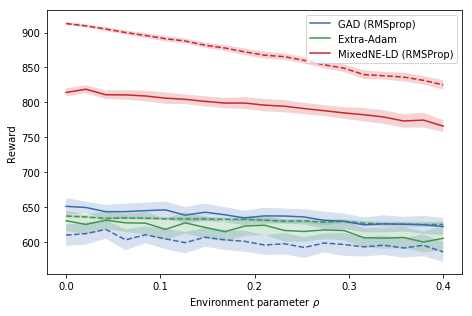

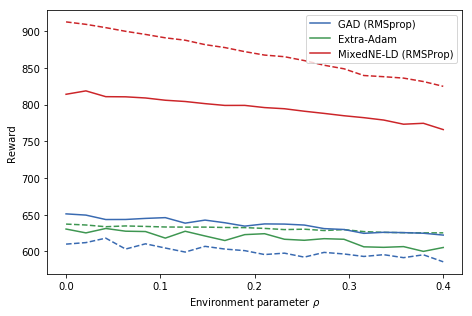

In [56]:
simple_exp = ['RMSprop/delta_0.0/lr_0.001/', 'ExtraAdam/delta_0.0/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.0/lr_0.0001/',\
              'RMSprop/delta_0.0/lr_0.001/', 'ExtraAdam/delta_0.0/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.0/lr_0.0001/']
exp = [simple_exp]    
plot_env_merge(exp, title = 'rho_0.0', comparison = True)
simple_exp = ['RMSprop/delta_0.1/lr_0.0001/', 'ExtraAdam/delta_0.1/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.1/lr_0.0001/',\
              'RMSprop/delta_0.1/lr_0.001/', 'ExtraAdam/delta_0.1/lr_0.001/', 'SGLD_thermal_0.001/delta_0.1/lr_0.0001/']
exp = [simple_exp]    
plot_env_merge(exp, title = 'rho_0.1', comparison = True)
simple_exp = ['RMSprop/delta_0.2/lr_0.0001/', 'ExtraAdam/delta_0.2/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.2/lr_0.0001/',\
              'RMSprop/delta_0.2/lr_0.0001/', 'ExtraAdam/delta_0.2/lr_0.0001/', 'E_SGLD_thermal_1e-05/delta_0.2/lr_0.001/']
exp = [simple_exp]    
plot_env_merge(exp, title = 'rho_0.2', comparison = True)

### Average Results

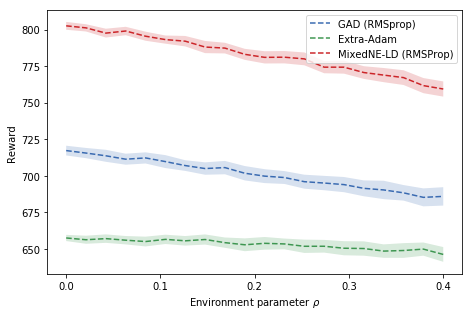

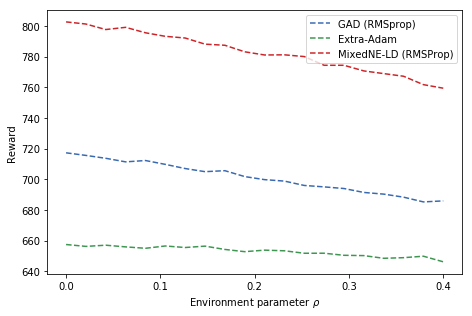

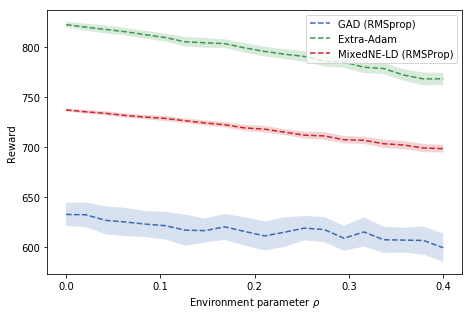

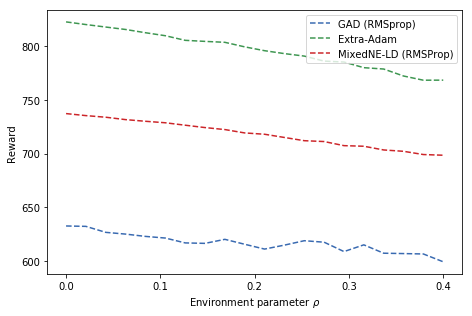

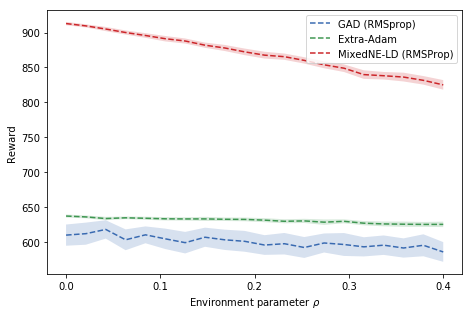

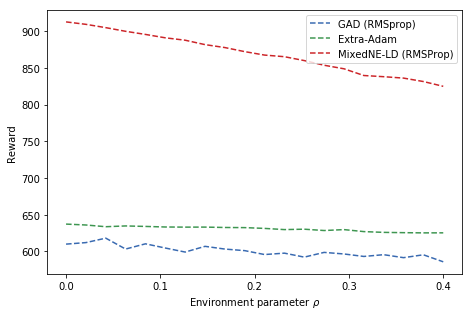

In [61]:
## One-Player Parameter
simple_exp = ['RMSprop/delta_0.0/lr_0.001/', 'ExtraAdam/delta_0.0/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.0/lr_0.0001/']
exp = [simple_exp]    
plot_env_all(exp, title = 'rho_0.0', comparison = True, OnePlayer = True, best = False)
simple_exp = ['RMSprop/delta_0.1/lr_0.0001/', 'ExtraAdam/delta_0.1/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.1/lr_0.0001/']
exp = [simple_exp]    
plot_env_all(exp, title = 'rho_0.1', comparison = True, OnePlayer = True, best = False)
simple_exp = ['RMSprop/delta_0.2/lr_0.0001/', 'ExtraAdam/delta_0.2/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.2/lr_0.0001/']
exp = [simple_exp]    
plot_env_all(exp, title = 'rho_0.2', comparison = True, OnePlayer = True, best = False)

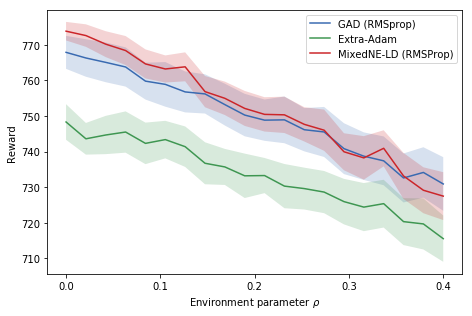

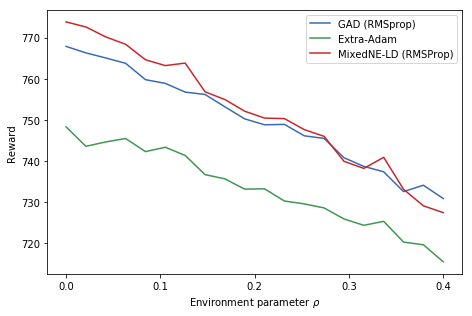

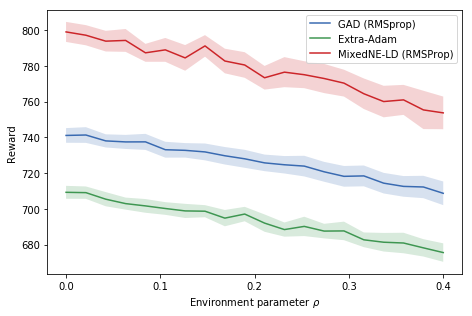

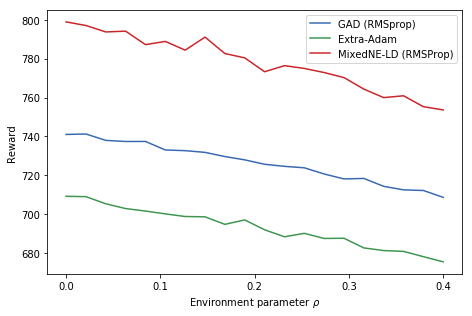

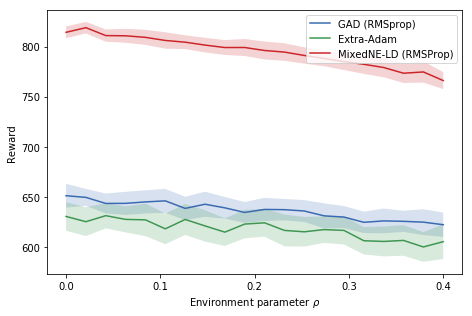

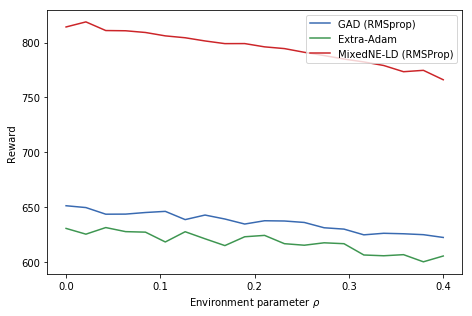

In [57]:
## Two-Player Parameter
simple_exp = ['RMSprop/delta_0.0/lr_0.001/', 'ExtraAdam/delta_0.0/lr_0.001/', 'SGLD_thermal_0.0001/delta_0.0/lr_0.0001/']
exp = [simple_exp]    
plot_env_all(exp, title = 'rho_0.0', comparison = True, OnePlayer = False, best = False)
simple_exp = ['RMSprop/delta_0.1/lr_0.001/', 'ExtraAdam/delta_0.1/lr_0.001/', 'SGLD_thermal_0.001/delta_0.1/lr_0.0001/']
exp = [simple_exp]    
plot_env_all(exp, title = 'rho_0.1', comparison = True, OnePlayer = False, best = False)
simple_exp = ['RMSprop/delta_0.2/lr_0.0001/', 'ExtraAdam/delta_0.2/lr_0.0001/', 'E_SGLD_thermal_1e-05/delta_0.2/lr_0.001/']
exp = [simple_exp]    
plot_env_all(exp, title = 'rho_0.2', comparison = True, OnePlayer = False, best = False)

## Ablation study

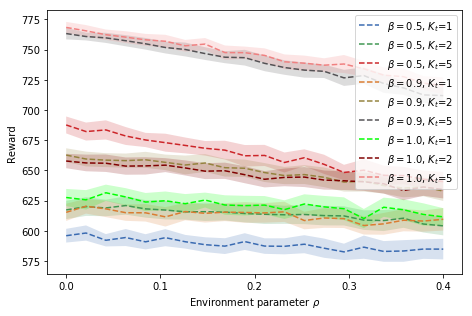

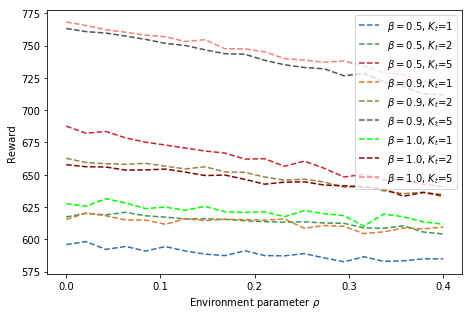

In [77]:
param = 'SGLD_thermal_0.0001/delta_0.2/lr_0.0001/'
simple_exp = [param+'beta_0.5/Kt_1/', param+'beta_0.5/Kt_2/', param+'beta_0.5/Kt_5/', param+'beta_0.9/Kt_1/', param+'beta_0.9/Kt_2/',\
              param+'beta_0.9/Kt_5/', param+'beta_1.0/Kt_1/', param+'beta_1.0/Kt_2/', param+'beta_1.0/Kt_5/']
exp = [simple_exp]    
plot_env_all(exp, title = 'Ablation', comparison = True, OnePlayer = True, best = False)